In [16]:
import pandas
import geopandas
import maup

import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)

blocks = geopandas.read_file("zip://./examples/blocks.zip")
precincts = geopandas.read_file("zip://./examples/precincts.zip")
districts = geopandas.read_file("zip://./examples/districts.zip")


assignment = maup.assign(precincts, districts)
# Add the assigned districts as a column of the `precincts` GeoDataFrame:
precincts["DISTRICT"] = assignment
assignment.head()

C:\Users\madie\anaconda3\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\madie\anaconda3\lib\site-packages\maup\assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


0     7
1     5
2    13
3     6
4     1
dtype: int64

In [17]:
variables = ["TOTPOP", "NH_BLACK", "NH_WHITE"]

assignment = maup.assign(blocks, precincts)
precincts[variables] = blocks[variables].groupby(assignment).sum()
precincts[variables].head()

C:\Users\madie\anaconda3\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\madie\anaconda3\lib\site-packages\maup\assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


,TOTPOP,NH_BLACK,NH_WHITE
0,5907,886,380
1,5636,924,1301
2,6549,584,4699
3,6009,435,1053
4,4962,156,3713


In [18]:
election_columns = ["PRES16D", "PRES16R"]
assignment = maup.assign(blocks, precincts)
# We prorate the vote totals according to each block's share of the overall
# precinct population:
weights = blocks.TOTPOP / assignment.map(precincts.TOTPOP)
prorated = maup.prorate(assignment, precincts[election_columns], weights)

# Add the prorated vote totals as columns on the `blocks` GeoDataFrame:
blocks[election_columns] = prorated
# We'll call .round(2) to round the values for display purposes.
blocks[election_columns].round(2).head()

C:\Users\madie\anaconda3\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\madie\anaconda3\lib\site-packages\maup\assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


,PRES16D,PRES16R
0,0.00,0.00
1,12.26,1.70
2,15.20,2.62
3,15.50,2.67
4,3.28,0.45


In [19]:
old_precincts = precincts
new_precincts = geopandas.read_file("zip://./examples/new_precincts.zip")

columns = ["SEN18D", "SEN18R"]

# Include area_cutoff=0 to ignore any intersections with no area,
# like boundary intersections, which we do not want to include in
# our proration.
pieces = maup.intersections(old_precincts, new_precincts, area_cutoff=0)

# Weight by prorated population from blocks
weights = blocks["TOTPOP"].groupby(maup.assign(blocks, pieces)).sum()
# Normalize the weights so that votes are allocated according to their
# share of population in the old_precincts
weights = maup.normalize(weights, level=0)

# Use blocks to estimate population of each piece
new_precincts[columns] = maup.prorate(
    pieces,
    old_precincts[columns],
    weights=weights
)
new_precincts[columns].head()

C:\Users\madie\anaconda3\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\madie\anaconda3\lib\site-packages\maup\intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\madie\anaconda3\lib\site-packages\maup\assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


,SEN18D,SEN18R
0,752.0,51.0
1,370.0,21.0
2,97.0,17.0
3,585.0,74.0
4,246.0,20.0


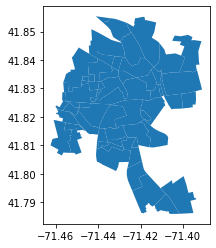

In [21]:
new_precincts.plot()

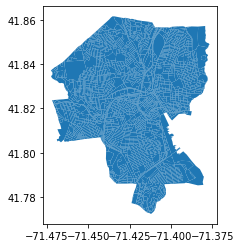

In [22]:
blocks.plot()

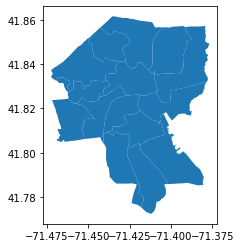

In [23]:
districts.plot()

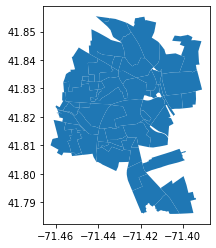

In [24]:
old_precincts.plot()